In [2]:
import numpy as np
from matplotlib import pyplot as plt, rcParams
import serpentTools

In [3]:
resD = serpentTools.read('bigT3D.txt_res.m')
resT = serpentTools.read('bigT3D_test.txt_res.m')
resR = serpentTools.read('bigT3D_test_ref.txt_res.m')
resW = serpentTools.read('bigT_FA1_2D.txt_res.m')

print(resD.resdata['absKeff'])
print("\n")
print(resR.resdata['absKeff'])
print("\n")
print(resD.resdata['burnup'])

burnup1 = np.zeros(len(resD.resdata['absKeff']))
burnup2 = np.zeros(len(resR.resdata['absKeff']))
burnup3 = np.zeros(len(resT.resdata['absKeff']))
kbigT = np.zeros(len(resD.resdata['absKeff']))
kRef = np.zeros(len(resR.resdata['absKeff']))
kTest = np.zeros(len(resT.resdata['absKeff']))
for i in range(0, len(resD.resdata['absKeff'])):
    burnup1[i] = resD.resdata['burnup'][i][0]
    kbigT[i] = resD.resdata['absKeff'][i][0]
    
for i in range(0, len(resR.resdata['absKeff'])):
    kRef[i] = resR.resdata['absKeff'][i][0]
    burnup2[i] = resR.resdata['burnup'][i][0]
    burnup3[i] = resT.resdata['burnup'][i][0]
    kTest[i] = resT.resdata['absKeff'][i][0]
    

[[1.03424e+00 3.20000e-04]
 [1.01155e+00 3.50000e-04]
 [1.00924e+00 2.90000e-04]
 [1.00618e+00 3.50000e-04]
 [1.00388e+00 3.30000e-04]
 [1.00229e+00 3.40000e-04]
 [1.00056e+00 3.10000e-04]
 [9.98016e-01 3.40000e-04]
 [9.94406e-01 3.30000e-04]
 [9.80015e-01 3.50000e-04]
 [9.65588e-01 3.20000e-04]
 [9.50759e-01 3.20000e-04]
 [9.36728e-01 3.10000e-04]
 [9.23780e-01 3.60000e-04]
 [9.10852e-01 3.60000e-04]
 [8.95843e-01 3.30000e-04]
 [8.86301e-01 3.20000e-04]
 [8.74748e-01 2.70000e-04]
 [8.60710e-01 3.30000e-04]
 [8.46760e-01 3.30000e-04]
 [8.33557e-01 3.60000e-04]
 [8.20398e-01 3.70000e-04]
 [8.09823e-01 3.80000e-04]]


[[1.34624e+00 2.30000e-04]
 [1.31625e+00 2.40000e-04]
 [1.30795e+00 2.10000e-04]
 [1.30384e+00 2.00000e-04]
 [1.29861e+00 2.20000e-04]
 [1.29310e+00 2.00000e-04]
 [1.28849e+00 1.80000e-04]
 [1.27481e+00 2.20000e-04]
 [1.26100e+00 2.10000e-04]
 [1.24762e+00 2.40000e-04]
 [1.23414e+00 2.30000e-04]
 [1.22183e+00 2.10000e-04]
 [1.20898e+00 2.40000e-04]
 [1.19712e+00 2.10000e-04

KeyError: 'burnup'

In [ ]:
resD.plot({'absKeff': r'$k_{\infty}$'})

resW.plot({'absKinf': r'$k_{\infty}$'})

<AxesSubplot:xlabel='Time $[d]$', ylabel='$k_{\\infty}$$ \\pm 3\\sigma$'>

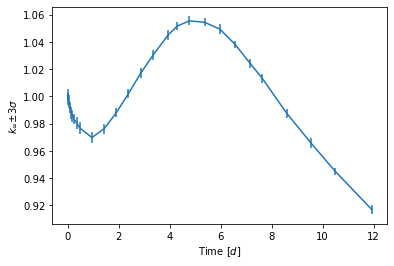

In [4]:
resW.plot({'absKinf': r'$k_{\infty}$'})

In [27]:
kref = np.linspace(1.30, 1, 19)
bref = np.linspace(0.1, 30, 19)

slope = (1.13- 1.31625)/(14.1767 - 0.0202524)

def f(x):
    return slope*x + 1.31

KREF = f(bref)
print(KREF)

[1.30868435 1.28682985 1.26497536 1.24312087 1.22126638 1.19941189
 1.1775574  1.15570291 1.13384842 1.11199393 1.09013944 1.06828495
 1.04643046 1.02457597 1.00272148 0.98086699 0.9590125  0.93715801
 0.91530352]


NameError: name 'burnup3' is not defined

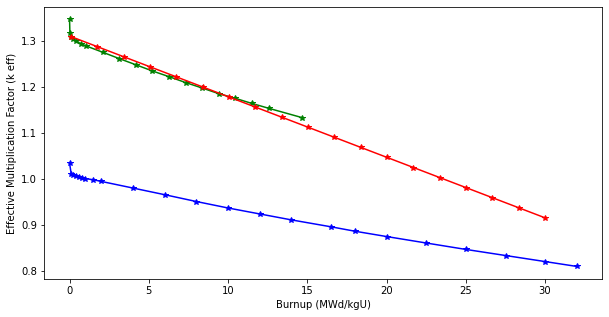

In [30]:
fig, (ax1) = plt.subplots(figsize=(10, 5));
plt.subplots_adjust(wspace=.5, hspace=.5);
ax1.set(xlabel = 'Burnup (MWd/kgU)', ylabel = 'Effective Multiplication Factor (k eff)');
ax1.plot(burnup1, kbigT, 'b-*', label = 'BigT');
ax1.plot(burnup2, kRef, 'g-*', label = 'Reference');
ax1.plot(bref, KREF, 'r-*', label = 'Reference Extrapolated');
ax1.plot(burnup3, kTest, 'o-*', label = 'BigT 43%boron');
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()
